In [2]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
from sklearn import preprocessing
from scipy.special import expit
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [3]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [4]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1969,11,0.426,0.697,0,-8.935,1,0.0347,0.687000,0.00203,0.2510,0.558,130.654,4
1,2016,44,0.501,0.898,8,-4.024,1,0.0575,0.002420,0.00000,0.2100,0.338,119.618,4
2,1973,30,0.497,0.526,0,-11.987,1,0.0543,0.056000,0.37000,0.5630,0.705,177.284,4
3,2018,28,0.382,0.719,2,-8.821,1,0.0396,0.000698,0.81100,0.0163,0.534,132.994,4
4,1998,59,0.410,0.601,7,-10.714,1,0.5040,0.127000,0.00000,0.1120,0.516,173.273,4


In [5]:
data["Popularity"].astype(str).astype(int)
data['Popularity_bucket']=data.Popularity.map(lambda x: x/10).apply(np.floor).astype(int)
data.head(10)

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_bucket
0,1969,11,0.426,0.697,0,-8.935,1,0.0347,0.687000,0.002030,0.2510,0.558,130.654,4,1
1,2016,44,0.501,0.898,8,-4.024,1,0.0575,0.002420,0.000000,0.2100,0.338,119.618,4,4
2,1973,30,0.497,0.526,0,-11.987,1,0.0543,0.056000,0.370000,0.5630,0.705,177.284,4,3
3,2018,28,0.382,0.719,2,-8.821,1,0.0396,0.000698,0.811000,0.0163,0.534,132.994,4,2
4,1998,59,0.410,0.601,7,-10.714,1,0.5040,0.127000,0.000000,0.1120,0.516,173.273,4,5
5,1972,5,0.561,0.816,6,-13.114,1,0.9310,0.856000,0.000000,0.9680,0.262,106.915,4,0
6,2000,11,0.557,0.670,10,-7.498,0,0.0559,0.022500,0.000003,0.8120,0.229,101.269,4,1
7,1970,37,0.458,0.160,3,-14.836,1,0.0376,0.732000,0.000038,0.1470,0.153,133.555,3,3
8,2004,29,0.804,0.580,5,-6.761,0,0.0474,0.024900,0.000038,0.2180,0.836,99.999,4,2
9,1993,36,0.551,0.496,5,-8.049,1,0.0293,0.157000,0.000001,0.0934,0.200,105.837,3,3


In [6]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.8*len(data)), int(.9*len(data))])

In [7]:
# Split output and convert to array
train_output = train_data.Popularity_bucket
train_data = train_data.drop(['Popularity_bucket'], axis=1)
train_data = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])

validate_output = validate_data.Popularity_bucket
validate_data = validate_data.drop(['Popularity_bucket'], axis=1)
validate_data = np.asarray(validate_data,dtype=np.float64)
validate_count = len(validate_data[:,0])

test_output = test_data.Popularity_bucket
test_data = test_data.drop(['Popularity_bucket'], axis=1)
test_data = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])

In [8]:
#class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
# activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
# learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, 
# shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

mlp = MLPClassifier(hidden_layer_sizes=(14, 8,),solver='adam', activation='tanh',max_iter=50)
mlp.fit(train_data,train_output)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

[2.286313546708876, 2.0790749043061636, 1.9754760476404658, 1.8953326553365721, 1.846896812013558, 1.7960318004644027, 1.7498738672881295, 1.6934461502677864, 1.5944152015767878, 1.5113674764982767, 1.4377380823433648, 1.3531815946165215, 1.2943464610614963, 1.222602189959911, 1.1727732898889278, 1.13220733931026, 1.0812645561386545, 1.0560875364295699, 1.0152088530276697, 0.9915474941096629, 0.9929242486017236, 0.9613774375143264, 0.9467093078890854, 0.9377789189159607, 0.9099591773944417, 0.9042988927483014, 0.9216748113270194, 0.8884400323744651, 0.8774620691439027, 0.8758421303868541, 0.8658357119171434, 0.8783829742139784, 0.8631433467851084, 0.8482028014245964, 0.8640741307380749, 0.8526864807370735, 0.8598166534288236, 0.8500165913737467, 0.8402083673236964, 0.8271636611887409, 0.8246947465137372, 0.8554745603735752, 0.8877005365504579, 0.8352250581138253, 0.8260582695449458, 0.8305832640774905, 0.8189351284311003, 0.8136135843829129, 0.809502340350996, 0.8159208414006496]


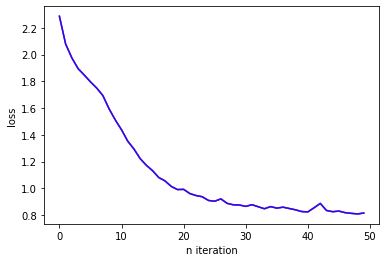

In [12]:
loss_values = mlp.loss_curve_
loss_values_test = mlp_t.loss_curve_
loss_values_valid = mlp_v.loss_curve_
plt.xlabel("n iteration")
plt.ylabel("loss")
print(loss_values)
plt.plot(loss_values,color='green', alpha=0.8, label='Train')
plt.plot(loss_values_test,color='magenta', alpha=0.8, label='Test')
plt.plot(loss_values_valid,color='blue', alpha=0.8, label='Validation')
plt.show()

In [131]:
test_pred = mlp.predict(test_data)
print("Testing set score: {}".format(mlp.score(test_data,test_output)))

Testing set score: 0.21162981162981162


In [132]:
print("accuracy score of training: {}".format(accuracy_score(train_output,mlp.predict(train_data))))
print("accuracy score of testing: {}".format(accuracy_score(test_output,mlp.predict(test_data))))
print("accuracy score of validating: {}".format(accuracy_score(validate_output,mlp.predict(validate_data))))

accuracy score of training: 0.20542643595781715
accuracy score of testing: 0.21162981162981162
accuracy score of validating: 0.209043250327654


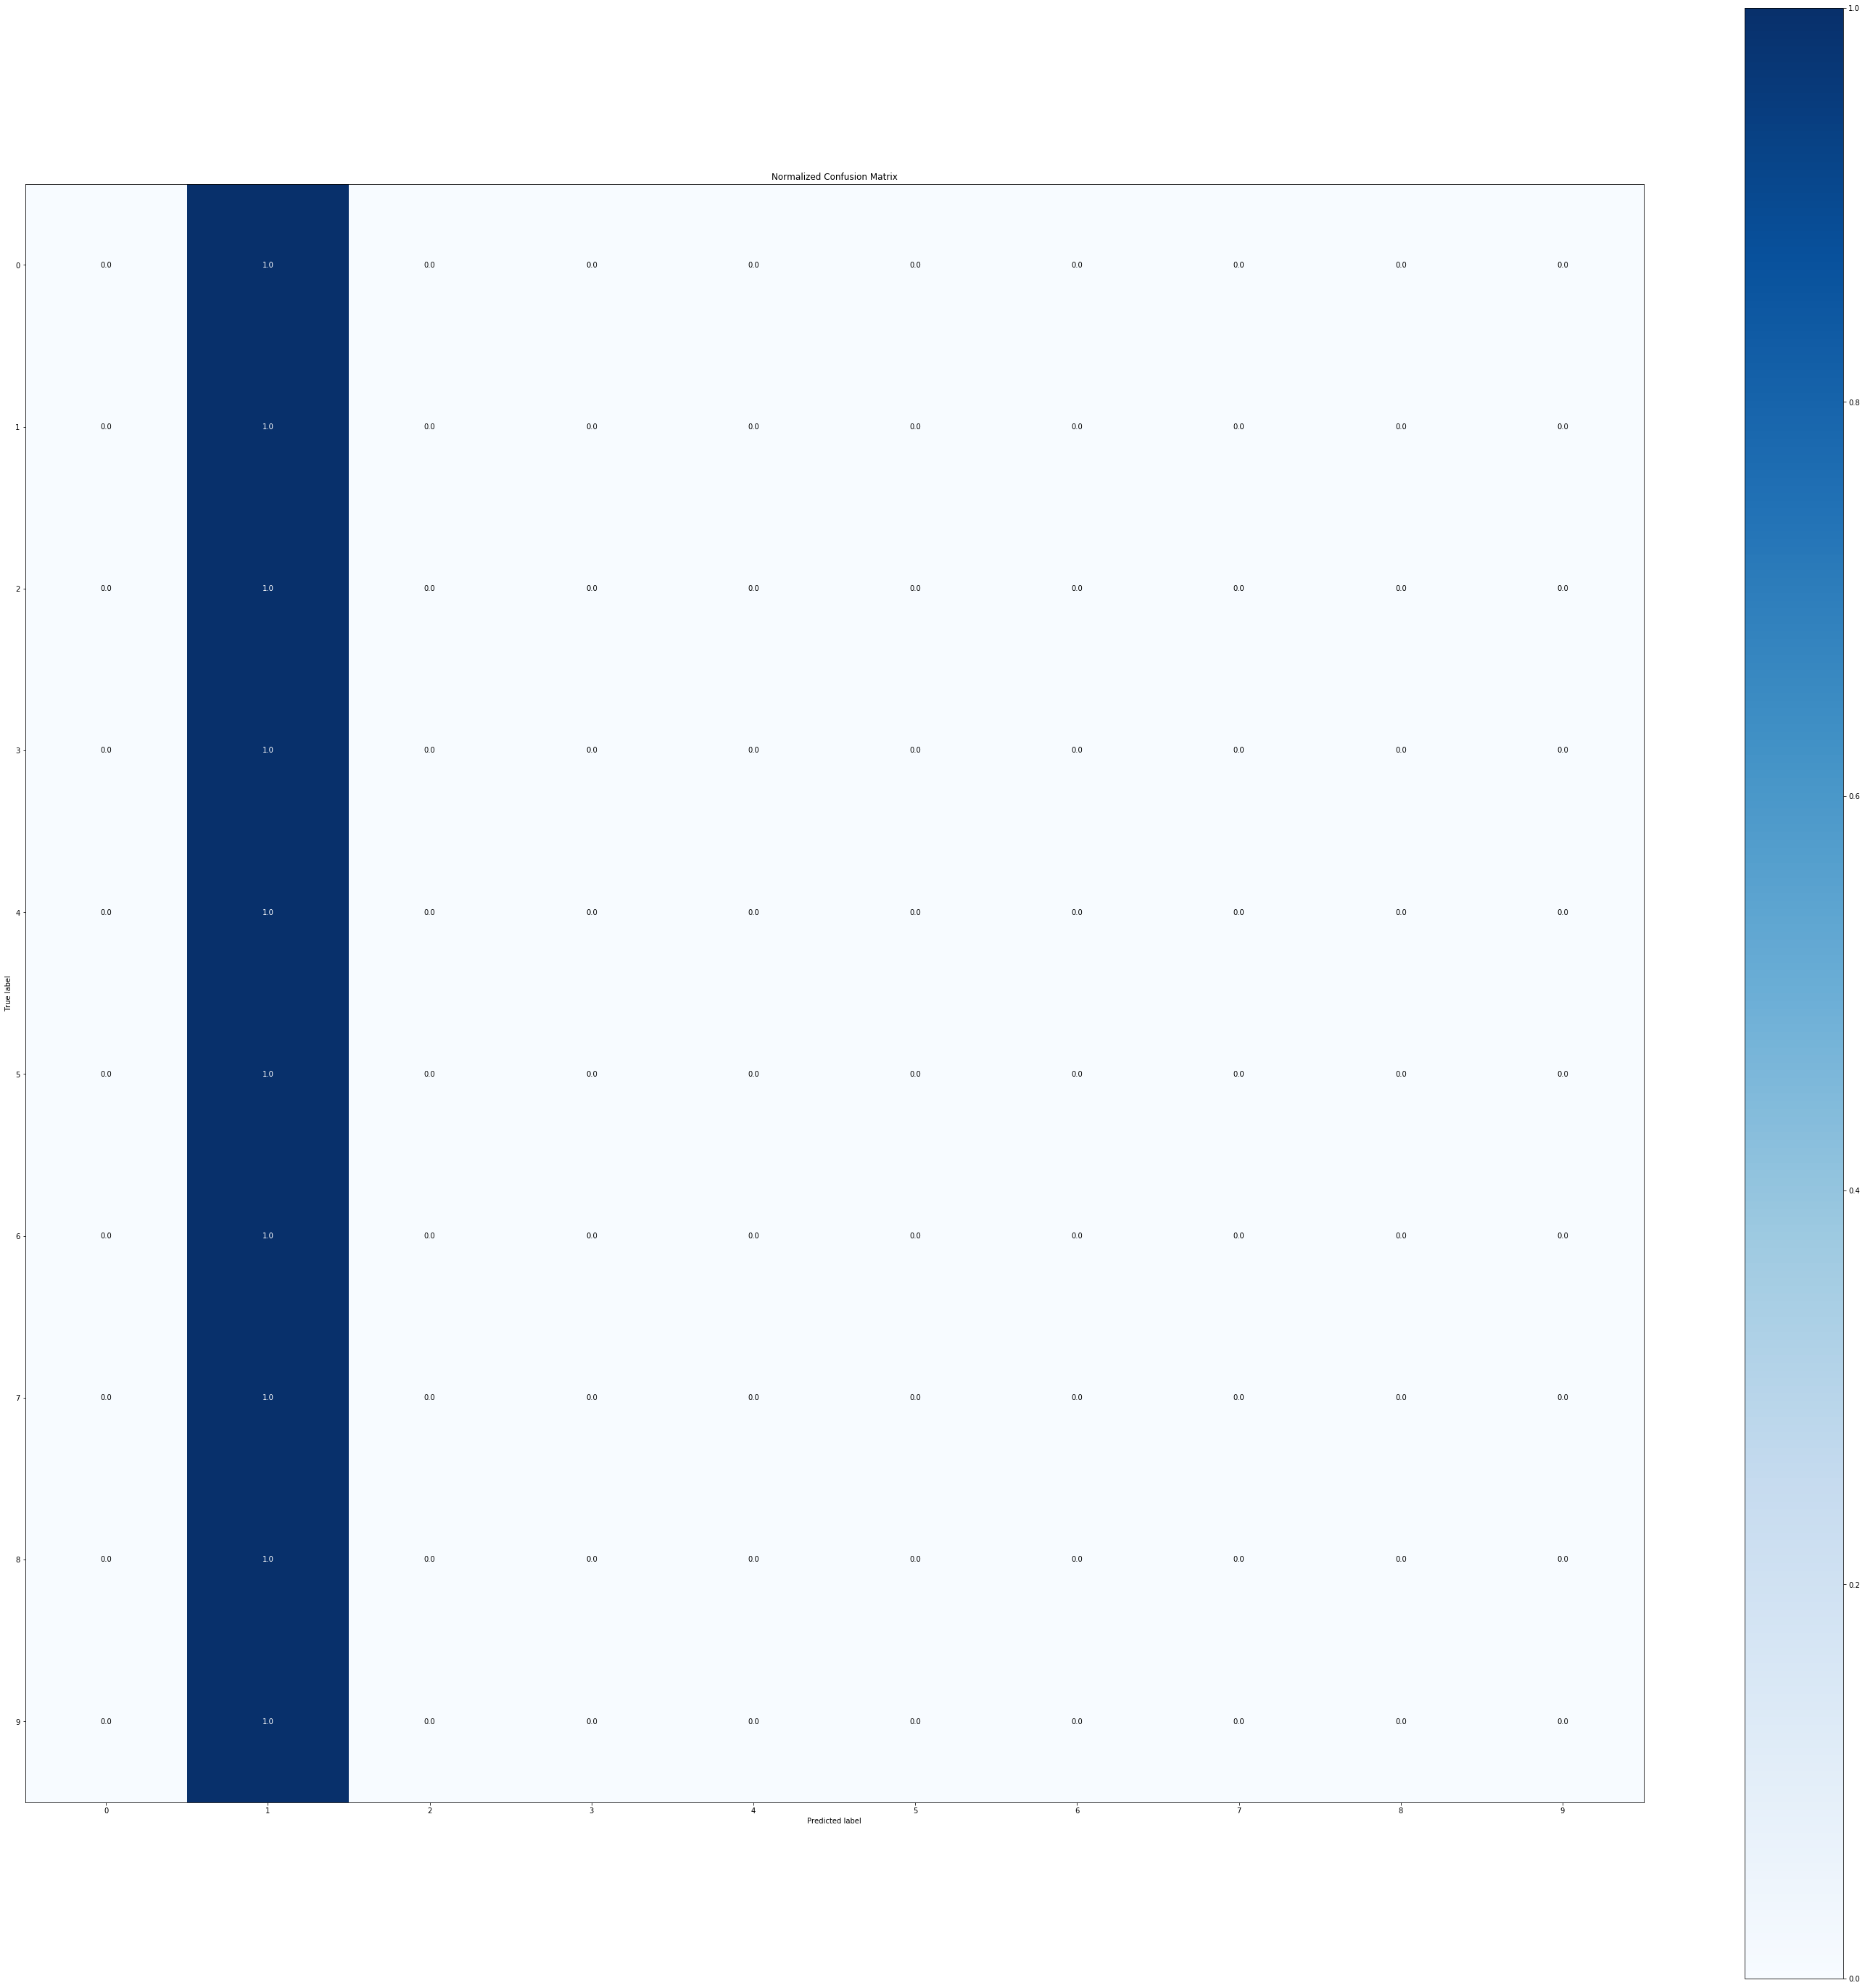

In [134]:
skplt.metrics.plot_confusion_matrix(test_output, test_pred, normalize=True, figsize=(50,50))

In [28]:
N_TRAIN_SAMPLES = train_data.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(train_output)

scores_train = []
scores_test = []
scores_validate = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(train_data.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        #indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(train_data, train_output, classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(train_data, train_output))

    # SCORE TEST
    scores_test.append(mlp.score(test_data, test_output))
    
    # SCORE validate
    scores_validate.append(mlp.score(validate_data, validate_output))

    epoch += 1


epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


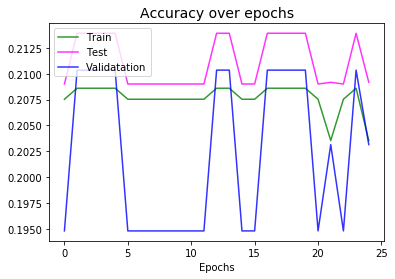

In [29]:
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.plot(scores_validate, color='blue', alpha=0.8, label='Validatation')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

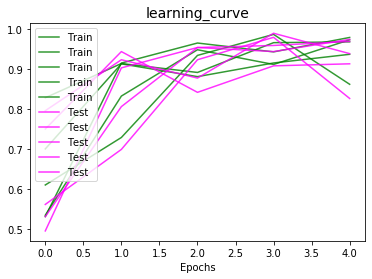

In [9]:
cv = ShuffleSplit(n_splits=5, test_size=0.004, random_state=0)
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(MLPClassifier(), train_data, train_output, cv=cv, n_jobs=1,
                       train_sizes=[0.1, 0.33, 0.55, 0.78, 1. ],
                       return_times=True)

plt.plot(train_scores, color='green', alpha=0.8, label='Train')
plt.plot(test_scores, color='magenta', alpha=0.8, label='Test')
#plt.plot(scores_validate, color='blue', alpha=0.8, label='Validatation')
plt.title("learning_curve", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

In [37]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)

# Instantiate the classification model and visualizer
model = MLPClassifier()
visualizer = learning_curve(
    model, cv=cv, scoring='f1_weighted', train_sizes=[0.1, 0.33, 0.55, 0.78, 1. ], n_jobs=4)

visualizer.fit(train_data, train_output)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

TypeError: learning_curve() missing 2 required positional arguments: 'X' and 'y'